*pas dit blok aan (dubbelklik om te wijzigen)*

# 2020 Diffusie werkcollege opdracht
***

## Datum: 14-feb-2020
## Hoofdstuk: 2
## Groep nummer: 32
***
## Student 1
    naam: Julian van Doorn
    Studentnr: s2518074

## Student 2
    naam: Nathaniel Pranger
    Studentnr: s2631016


In [39]:
# Dit blok moet altijd als eerste worden uitgevoerd. Verwijder het dus niet!
# voer blokken uit met shift-enter, of met de ▶-knop in de knoppenbalk

from __future__ import division

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [40]:
# Opgave 2.3 a
n_vazen = 10000

vazen = np.tile(['r', 'r', 'r', 'r', 'r', 'r', 'r', 'b', 'b', 'b', 'o', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g', 'g'], (n_vazen, 1))
print(f'Shape of vazen: {np.shape(vazen)}')

Shape of vazen: (10000, 20)


In [41]:
# Opgave 2.3 b
for vaas in vazen:
    np.random.shuffle(vaas)
    
print(f'First row of vazen: {vazen[0]}')
print(f'Shape of vazen: {np.shape(vazen)}')

First row of vazen: ['r' 'g' 'g' 'r' 'r' 'r' 'b' 'o' 'g' 'r' 'g' 'r' 'g' 'b' 'b' 'g' 'g' 'g'
 'r' 'g']
Shape of vazen: (10000, 20)


In [42]:
# Opgave 2.3 c
knikkers = vazen[:,0:4]
print(f'Shape of knikkers: {np.shape(knikkers)}')

kans_rbog = np.count_nonzero(np.count_nonzero((knikkers == ['r', 'b', 'o', 'g']), axis=1) == 4) / n_vazen
print(f'P(r b o g) = {kans_rbog}')

Shape of knikkers: (10000, 4)
P(r b o g) = 0.001


De berekende kans in het huiswerk was 21/12930 (~0.0016) dit komt vrij goed overeen met de empirische kans.

In [43]:
# Opgave 2.3 d
reds = np.sum(knikkers == 'r', axis=1) == 1
blues = np.sum(knikkers == 'b', axis=1) == 1
oranges = np.sum(knikkers == 'o', axis=1) == 1
greens = np.sum(knikkers == 'g', axis=1) == 1

kans_rbog_onb = np.count_nonzero(reds * blues * oranges * greens) / n_vazen
print(f'P((r b o g)*) = {kans_rbog_onb}')

P((r b o g)*) = 0.0387


De berekende kans in het huiswerk was 63/1615 (~0.039) dit komt vrij goed overeen met de empirische kans.

In [44]:
# Opgave 2.3 e
reds2 = np.sum(knikkers == 'r', axis=1) == 2
greens2 = np.sum(knikkers == 'g', axis=1) == 2

kans_rrgg_onb = np.count_nonzero(reds2 * greens2) / n_vazen
print(f'P((r r g g)*) = {kans_rrgg_onb}')

P((r r g g)*) = 0.1504


De berekende kans in het huiswerk was 252/1615 (~0.156) dit komt vrij goed overeen met de empirische kans.

In [45]:
# Opgave 2.3 f
reds3 = np.sum(knikkers[:,:3] == 'r', axis=1) == 0

kans_geen_r = np.count_nonzero(reds3) / n_vazen
print(f'P(!r) = {kans_geen_r}')

P(!r) = 0.2543


We hebben in het huiswerk een fout gemaakt. De kans had moeten zijn 13 over 3 gedeeld door 20 over 3. Dit levert een kans van 143/570 (~0.25), dit komt overeen met ons empirische resultaat.

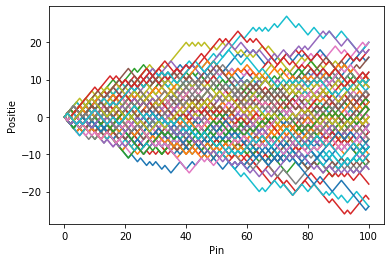

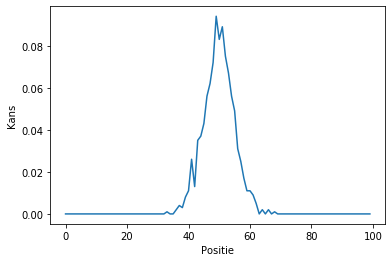

In [46]:
# Galton bord set-up van vorige week
n_lagen = 100
balls = 1000

n_bakjes = n_lagen + 1
n_bakjes_spaced = np.linspace(0, n_bakjes)

richtingen = np.random.choice([-1, 1], n_lagen * balls)
richtingen = np.resize(richtingen, (balls, n_lagen))

posities = np.zeros((balls, 1))
posities = np.append(posities, np.cumsum(richtingen, axis=1), axis=1)

plt.plot(posities[:100].T)

plt.ylabel('Positie')
plt.xlabel('Pin')
plt.show()

frequencies, grenzen = np.histogram(posities[:, n_lagen], np.arange(-n_bakjes, n_bakjes, 2))
kans = frequencies / balls

plt.plot(kans)

plt.xlabel('Positie')
plt.ylabel('Kans')
plt.show()

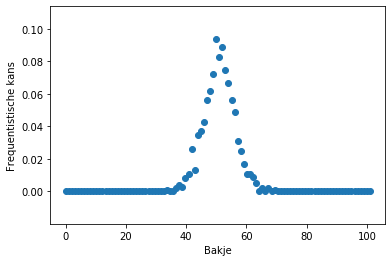

In [47]:
# Opgave 2.4 a
plt.scatter(np.linspace(0, n_bakjes, np.shape(kans)[0]), kans)

plt.xlabel('Bakje')
plt.ylabel('Frequentistische kans')
plt.show()

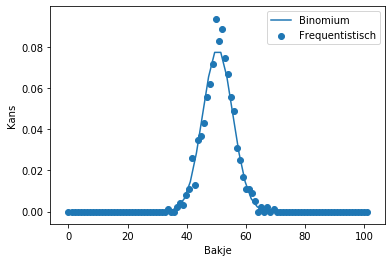

In [48]:
# Opgave 2.4 b
from scipy.special import binom

# Bereken het binomium voor ieder bakje
binom_kans = binom(n_bakjes, n_bakjes_spaced) / (2**n_bakjes)

plt.plot(n_bakjes_spaced, binom_kans, label='Binomium')
plt.scatter(np.linspace(0, n_bakjes, np.shape(kans)[0]), kans, label='Frequentistisch')

plt.legend()
plt.xlabel('Bakje')
plt.ylabel('Kans')
plt.show()

De waarden van de voorspelling komen zeer accuraat overeen met de frequentistische waarden. 

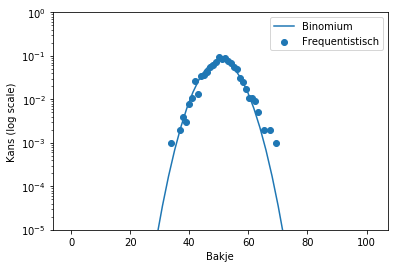

In [49]:
# Opgave 2.4 c
plt.semilogy(n_bakjes_spaced, binom_kans, label='Binomium')
plt.scatter(np.linspace(0, n_bakjes, np.shape(kans)[0]), kans, label='Frequentistisch')

plt.ylim(10**-5, 1)
plt.legend()
plt.xlabel("Bakje")
plt.ylabel("Kans (log scale)")
plt.show()

Stel, in een bakje landt maar 1 bal. Dan is de frequentistische kans 1/n_lagen = 10^-3. Tussen deze frequentie en 0 zijn geen andere mogelijkheden, dus we kunnen hier geen datapunten zien.

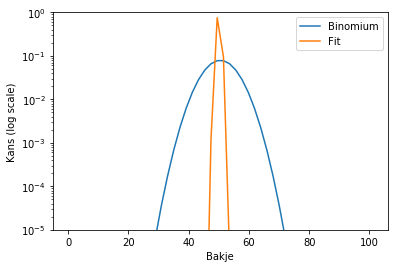

In [50]:
# Opgave 2.4 d
plt.semilogy(n_bakjes_spaced, binom_kans, label='Binomium')

a = (n_lagen // 2) ** 2
b = -n_lagen
c = 1
fit = np.exp(-(a + b * n_bakjes_spaced + c * n_bakjes_spaced ** 2))

plt.semilogy(n_bakjes_spaced, fit, label='Fit')

plt.ylim(10**-5, 1)
plt.legend()
plt.xlabel("Bakje")
plt.ylabel("Kans (log scale)")
plt.show()

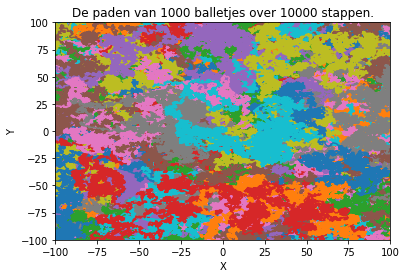

In [51]:
# Opgave 2.5 a
n_balls = 1000
n_t = 10000
v_t = np.sqrt(n_t) # view width/height

richtingen = np.random.uniform(0, 2 * np.pi, (n_balls, n_t))
stappen_x = np.cos(richtingen)
stappen_y = np.sin(richtingen)

posities_x = np.cumsum(stappen_x, axis=1).T
posities_y = np.cumsum(stappen_y, axis=1).T

plt.plot(posities_x, posities_y)

plt.xlabel('X')
plt.ylabel('Y')
plt.title("De paden van " + str(n_balls) + " balletjes over " + str(n_t) + " stappen.")
plt.xlim(-v_t, v_t)
plt.ylim(-v_t, v_t)
plt.show()

Met de gekozen view waarden blijven de randomwalks redelijk binnen de view.

In [52]:
# Opgave 2.5 b

def diffusie2d(n_balls: int, n_t: int):
    richtingen = np.random.uniform(0, 2 * np.pi, (n_balls, n_t))
    stappen_x = np.cos(richtingen)
    stappen_y = np.sin(richtingen)
    
    positie_x = np.sum(stappen_x, axis=1).T
    positie_y = np.sum(stappen_y, axis=1).T
    
    return positie_x, positie_y

In [53]:
# Opgave 2.5 c

positie_x, positie_y = diffusie2d(n_balls, n_t)
distances = np.sqrt(positie_x ** 2 + positie_y ** 2)
average_distance = np.mean(distances)
print(f'De gemiddelde afstand na {n_t} stappen is {average_distance:.2f}')

De gemiddelde afstand na 10000 stappen is 89.25


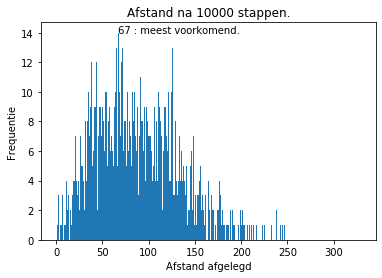

De meest voorkomende afstand is 67. Dit is niet gelijk aan de gemiddelde afstand, omdat de verdeling niet symmetrisch is.


In [54]:
# Opgave 2.5 d
frequencies, grenzen = np.histogram(distances, bins=np.arange(0,np.max(distances)))

plt.bar(grenzen[:-1], frequencies, align='edge', width=1)

meeste = np.where(frequencies == np.max(frequencies))
resultaat = meeste[0][0]
text = f'{resultaat} : meest voorkomend.'

plt.text(resultaat, np.max(frequencies), text)
plt.xlabel('Afstand afgelegd')
plt.ylabel('Frequentie')
plt.title(f'Afstand na {n_t} stappen.')
plt.show()

print(f'De meest voorkomende afstand is {resultaat}. Dit is niet gelijk aan de gemiddelde afstand, omdat de verdeling niet symmetrisch is.')

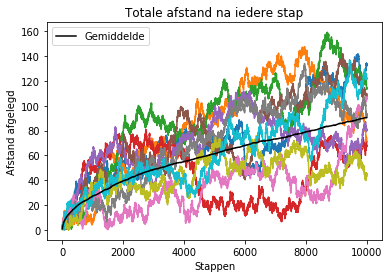

In [55]:
# Opgave 2.5 e

path_distances = np.sqrt(posities_x ** 2 + posities_y ** 2)
average_path_distance = np.mean(path_distances, axis=1)

plt.plot(path_distances[:, :10])
plt.plot(average_path_distance, color='k', label='Gemiddelde')

plt.xlabel('Stappen')
plt.ylabel('Afstand afgelegd')
plt.title('Totale afstand na iedere stap')
plt.legend()
plt.show()

De gemiddelde afstand lijkt sterk op een wortelfunctie van het aantal stappen.

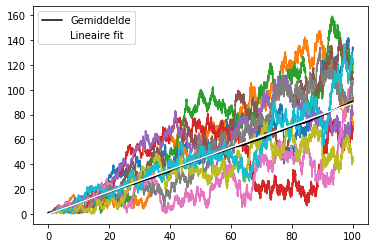

De richtingscoëfficiënt van dit gelineariseerde gemiddelde is 0.893


In [56]:
# Opgave 2.5 f

rc = average_distance/np.sqrt(n_t)
plt.plot(np.sqrt(np.arange(0,n_t)), path_distances[:, :10])
plt.plot(np.sqrt(np.arange(0,n_t)), average_path_distance, color='k', label='Gemiddelde')
plt.plot(np.sqrt(np.arange(0,n_t)) , rc*np.sqrt(np.arange(0,n_t)), color='w', label='Lineaire fit')
plt.legend()
plt.show()


print(f'De richtingscoëfficiënt van dit gelineariseerde gemiddelde is {rc:.3f}')
